Instructions
Import the necessary libraries.

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

Change effective to date column to datetime format.

Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

Plot a correlation matrix, comment what you see.

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

Comment what you can see in the plots.

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [1]:
# 1. Import the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# 3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# Target value is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
# Your code here    #Snake Case
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


5. Change effective to date column to datetime format.

In [7]:
# https://saturncloud.io/blog/converting-a-column-to-date-format-in-pandas-dataframe/#:~:text=Method%201%3A%20Using%20the%20to_datetime()%20function&text=Next%2C%20we%20use%20the%20to_datetime,date%E2%80%9D%20column%20of%20the%20dataframe.
# df["date"] = pd.to_datetime(df["date"])

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [8]:
customer_df['customer_lifetime_value'].value_counts(dropna=False)

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [9]:
customer_df['number_of_open_complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [10]:
customer_df['number_of_policies'].value_counts(dropna=False)

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [11]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [12]:
numerical_df = customer_df.select_dtypes(include = np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [13]:
numerical_df['months_since_last_claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

In [14]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
# Function to Count all the unique values in a dataframe

def count_unique_values(dataframe):
    unique_value_counts = dataframe.nunique()
    return unique_value_counts

In [16]:
unique_counts = count_unique_values(numerical_df)
print(unique_counts)

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64


7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [17]:
#discrete of unique values less than 3 percent then i categorize as district

In [52]:
def categorize_variables(dataframe):
    continuous = []
    discrete = []
    for column in dataframe.columns:
        if len(dataframe[column].unique()) > 250:
            continuous.append(column)
        else:
            discrete.append(column)
    return pd.DataFrame(dataframe[continuous]), pd.DataFrame(dataframe[discrete])

continuous_df, discrete_df = categorize_variables(numerical_df)

In [54]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [55]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [ ]:
# After looking at the unique values I categorize the numerical
    #discrete values (monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies )
    # The reason to classify them as categorial is the relatively small numer of unique values. (small range)
   

8. Plot a correlation matrix, comment what you see.

In [23]:
# Checking for multicollinearity
# we use the heatmap (only for numerical values).

# We can not see the correlation between features and target, because the target is categorial (Churn) (status = Yes or No)
# Because heatmap shows only correlations for numerical values!
# The seperation of numerical and categorial is done automatically by the .corr function

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

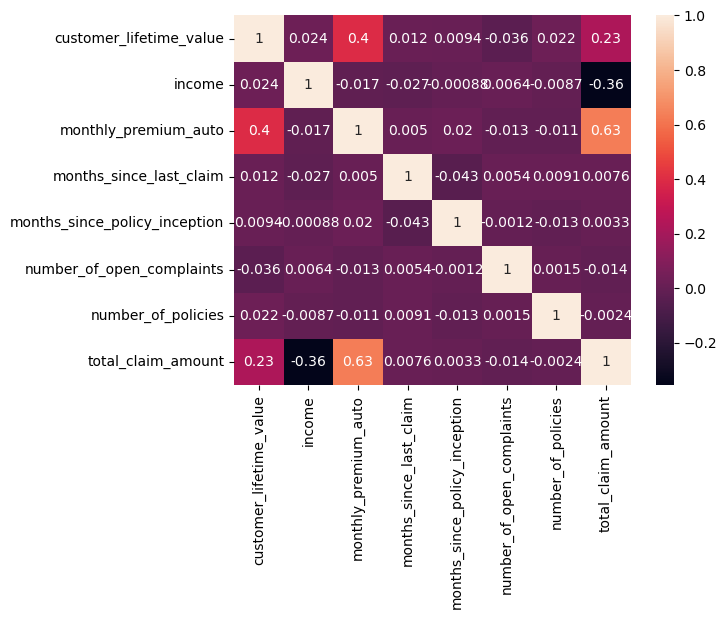

In [25]:
# Heatmap for numerical_df
    # Keep in mind that total_claim_amount is our target here!
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [26]:
# I can see that there are no extremely high correlations between features. Therefore I do not need to drop any feature.
# I have a high correlation between monthly_premium_auto and my target value total_claim_amount, which is good.

9. Create a function to plot every discrete variable. 
Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [ ]:
#def plot_continuous_variables(numerical_df):
    #continuous_columns = numerical_df.select_dtypes(include=['float']).columns (would be a general way to chose)
    #for column in continuous_columns:
        #plt.figure(figsize=(9, 12)) 
        #sns.histplot(data=numerical_df, x=column, kde=True)
        #plt.title(f'Continuous Variable: {column}')
        #plt.xlabel(column)
        #plt.ylabel('Frequency')
        #plt.show()

# Plot continuous variables
#plot_continuous_variables(numerical_df)
                   

        

In [59]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [57]:
# Plot all the continuous variables

def plot_continuous_variables(numerical_df):
    for column in numerical_df.columns:
        if pd.api.types.is_numeric_dtype(numerical_df[column]):
            plt.figure(figsize=(9, 6))  # Adjust the figure size as needed
            sns.histplot(data=numerical_df, x=column, kde=True)
            plt.title(f'Continuous Variable: {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

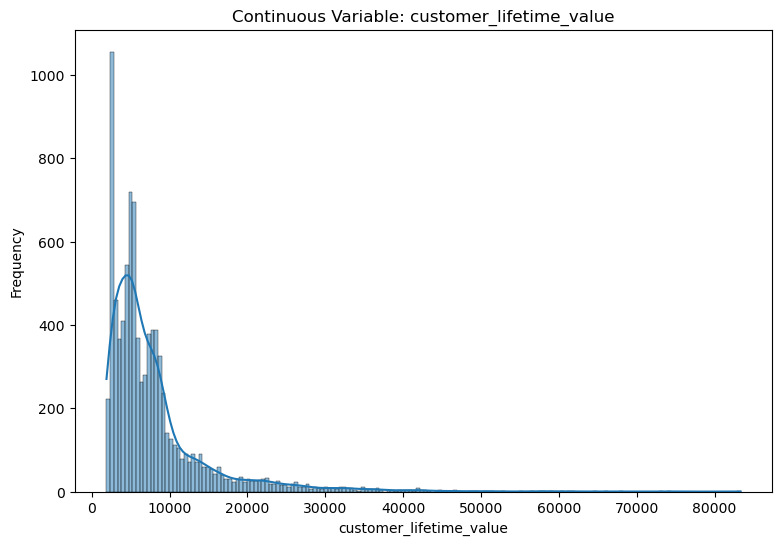

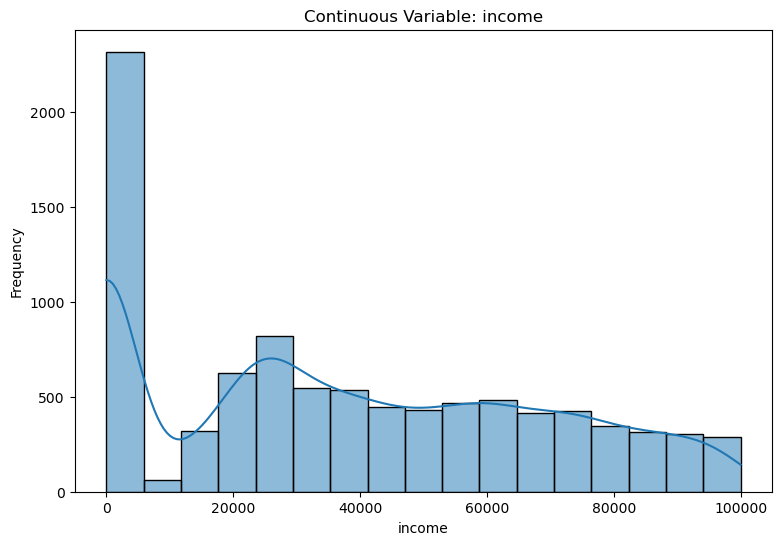

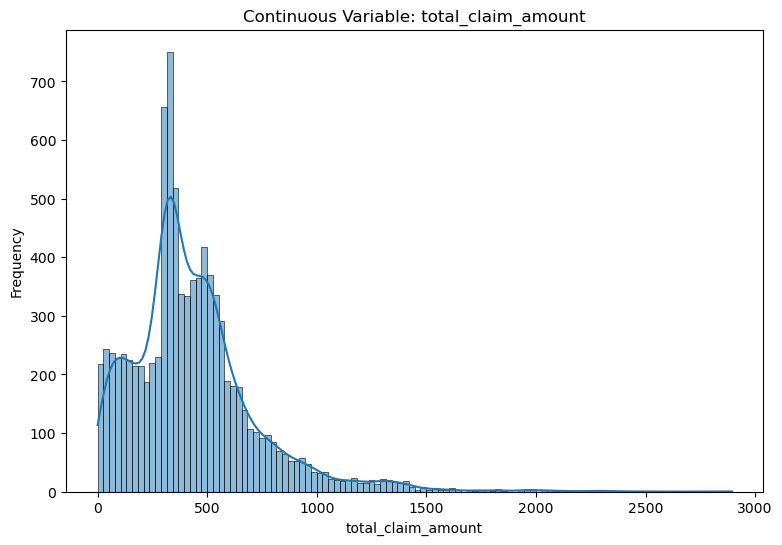

In [58]:
plot_continuous_variables(continuous_df)

In [60]:
# Plot all the discrete features.

def plot_discrete_numerical_variables(numerical_df):
    for column in numerical_df.columns:
        plt.figure(figsize=(9, 6))
        sns.countplot(data=numerical_df, x=column)
        plt.title(f'Discrete Numerical Variable: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

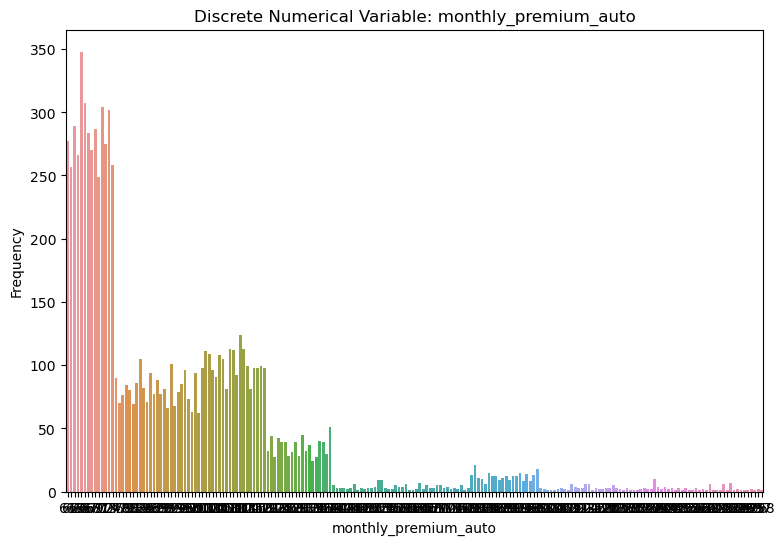

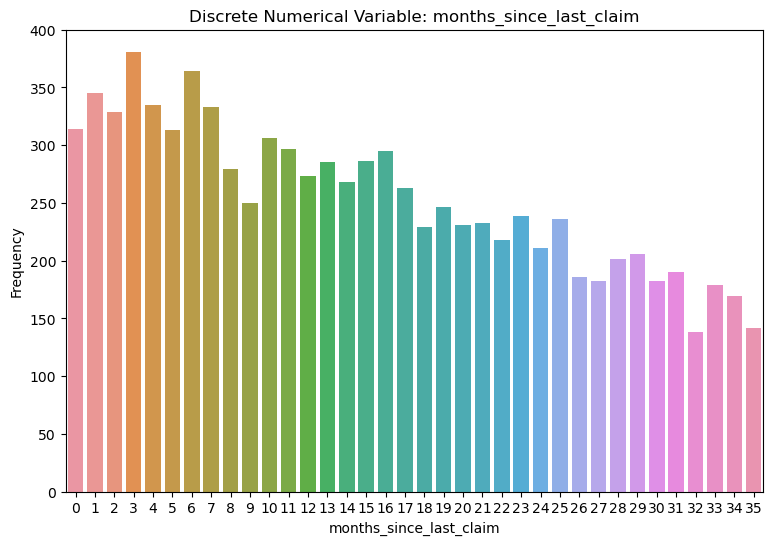

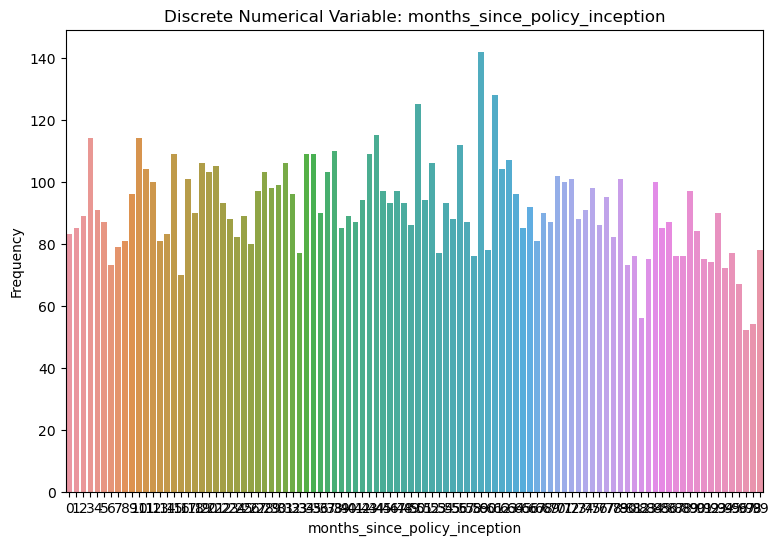

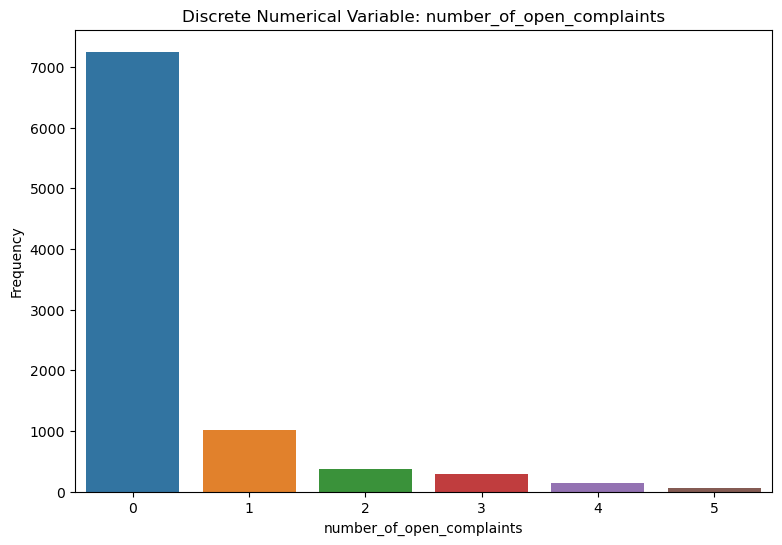

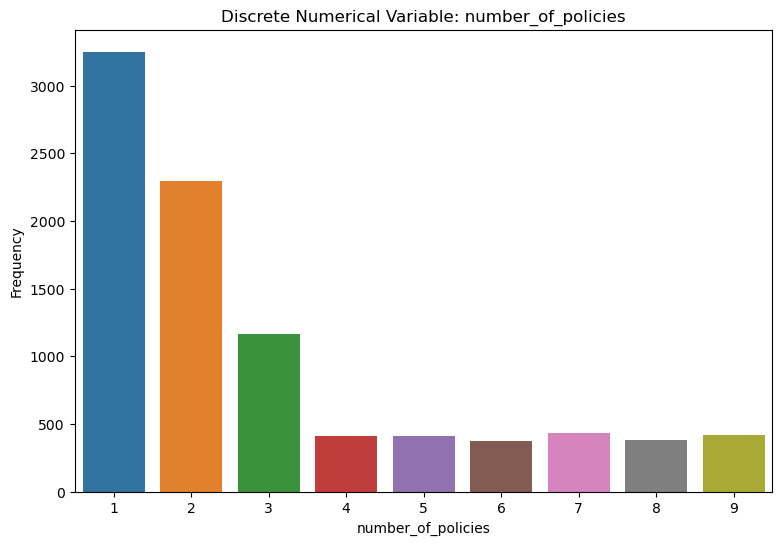

In [61]:
plot_discrete_numerical_variables(discrete_df)

10. Comment what you can see in the plots

In [ ]:
# Three of the features are right-skewed, namely monthly_premium_auto, number_of_open_complaints, number_of_policies
# month_since_last_claim is slightly right-skewed
# https://www.scribbr.com/statistics/skewness/#:~:text=negative%20skew)%3F-,A%20left%2Dskewed%20distribution%20is%20longer%20on%20the%20left%20side,referred%20to%20as%20negative%20skew.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [ ]:
# Use boxplot for this one, you can see outliers outside of the 75 percentile line.

In [62]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [70]:
def plot_boxplots(numerical_df):
    plt.figure(figsize=(12, 6))
    numerical_df.boxplot()
    plt.title("Box Plot for Numerical Data")
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()

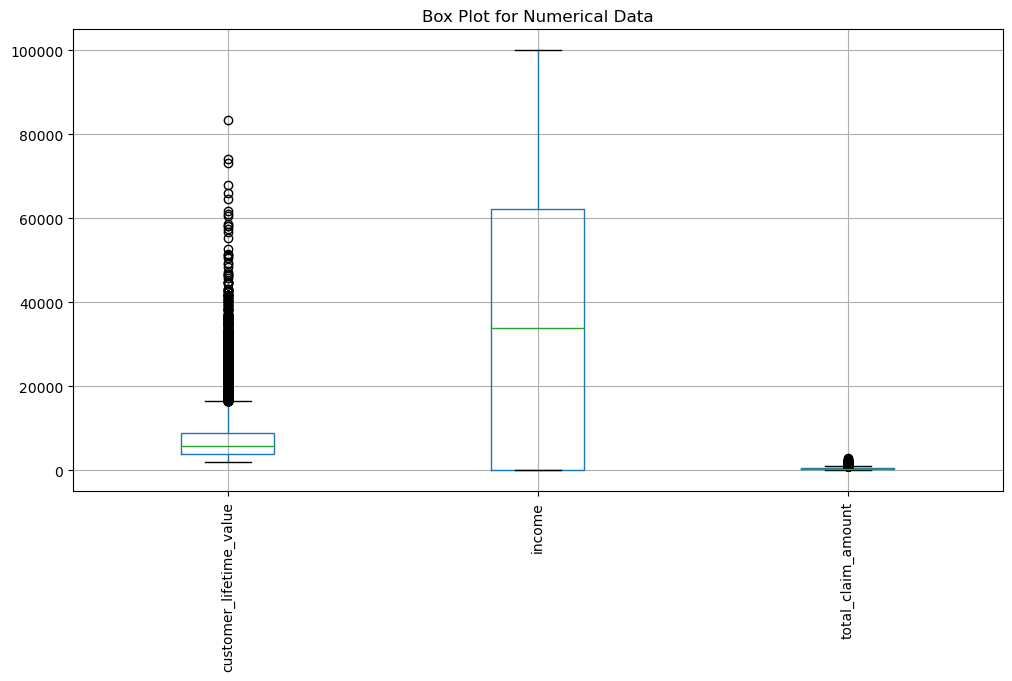

In [64]:
plot_boxplots(continuous_df)

In [ ]:
#There are hundreds of numbers they are just higher numbers not outliers
#Outliers would only be a really strange number, like data entry error etc.
#Keep as much data as possible 
# The data is skewed not outliers

# Do not drop any values

# Total claim amount has outliers, but that is our target, so we do not want to change it at all

In [ ]:
# We only drop data if it is non valid or if it is not worth while

In [ ]:
# Maybe there is a subsection of the numbers you could do something to 

In [ ]:
# Try to use the np.log thing to skew 

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm#:~:text=An%20outlier%20is%20an%20observation,what%20will%20be%20considered%20abnormal.

The outliers are out of the upper range 75 percentage quartile 

A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
lower inner fence: Q1 - 1.5*IQ
upper inner fence: Q3 + 1.5*IQ
lower outer fence: Q1 - 3*IQ
upper outer fence: Q3 + 3*IQ
Outlier detection criteria	A point beyond an inner fence on either side is considered a mild outlier. A point beyond an outer fence is considered an extreme outlier.

In [85]:
# Checking how many values will be removed if the outliers are removed
# iqr 

iqr = np.nanpercentile(continuous_df['income'],75) - np.nanpercentile(continuous_df['income'],25)

In [86]:
# Here we are searching for mild outliers

upper_limit = np.nanpercentile(continuous_df['income'],75) + 1.5*iqr
print(iqr)
print(upper_limit)

# everything outside of the inner fence could be considered outlier. 
# But this would only apply for one or two values not hundreds like in our case, looking at feature customer_lifetime_value

# Also our target value total_claim_amount has a few outliers. We are not going to change our target value!!!!

62320.0
155800.0


In [82]:
def calculate_iqr_and_upper_limit(dataframe):
    iqr_upper_limit = {}
    for column in dataframe.columns:
        if dataframe[column].dtype in [int, float]:
            q75, q25 = np.nanpercentile(dataframe[column], [75, 25])
            iqr = q75 - q25
            upper_limit = q75 + 1.5 * iqr
            iqr_upper_limit[column] = (iqr, upper_limit)
    return iqr_upper_limit

In [83]:
calculate_iqr_and_upper_limit(continuous_df)

{'customer_lifetime_value': (4967.915247000001, 16414.039911750002),
 'total_claim_amount': (275.25659425, 960.3997301249999)}

In [81]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [ ]:
# If you just have a few outliers you could do following (if not target value!)
    # Chose Max Value, this can be droped
    # Repeat dropping the max, than you dropped the 2 highest

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [48]:
# Check this in the main dataframe numerical_df. The result is that there are 0 Null values.

null_counts = numerical_df.isnull().sum()
null_counts

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [87]:
numerical_df.to_csv('numerical.csv', index=False)